In [1]:
import pandas as pd
import plotly.graph_objects as go

#RACE

data = pd.read_excel(r"C:\Users\Pinar\Documents\Commerce\Restore_Reopen\Restore and Reopen Grant Report 9.6.20(1).xlsx")

#cleaning race data
minority_stat_cols = data.loc[:,'Are You Of Hispanic, Latino, Or Spanish Origin?':'With Which Of The Following Categories Do You Identify -  (check All That Apply)']

num_hispanic = 0

for row in minority_stat_cols.index:
    try:
        hispanic = minority_stat_cols.iloc[row,0]
        if hispanic == 'Yes':
            num_hispanic = num_hispanic + 1
    except IndexError:
        break
        
colors = ['#ebd80e','#adaa84']
hispanic_graph = go.Figure(data=[go.Pie(labels=['Hispanic','Non-Hispanic'],values=[num_hispanic,186-num_hispanic],hole=.5)])
hispanic_graph.update_traces(textinfo='none',marker=dict(colors=colors))
#hispanic_graph.show(renderer='browser')

multiracial_col = []
minority_stat_cols = minority_stat_cols.rename(columns={'With Which Of The Following Categories Do You Identify -  (check All That Apply)':'Race'})

for row in minority_stat_cols.itertuples():
    value = str(row.Race)
    container = len(value)
    if container > 30:
        value = 'Multiracial'
    multiracial_col.append(value)
minority_stat_cols['Race'] = multiracial_col
races = minority_stat_cols.groupby(by=['Race'])
race_names = list(races.groups.keys())
race_size = races.size().tolist()


print(race_names, race_size)
colors = ['#ffaa00','#82675a','#e09a0d','#a85a32','#a1677c','#ffcd69','#857352']
#race_graph = go.Figure(data=[go.Sunburst(labels=race_names, parents=['','','','','','','Choose not to answer'],values=race_size)])
race_graph = go.Figure(data=[go.Pie(labels=race_names, values=race_size)])
race_graph.update_traces(textinfo='percent+label',marker=dict(colors=colors))
race_graph.show(renderer='browser')


['Asian', 'Black of African American', 'Choose not to answer', 'Multiracial', 'Other race, ethnicity, origin', 'White/Caucasian'] [100, 53, 6, 7, 10, 10]


In [14]:
import pandas as pd
import plotly.graph_objects as go

#GENDER
data = pd.read_excel(r"C:\Users\Pinar\Documents\Commerce\Restore_Reopen\Restore and Reopen Grant Report 9.6.20(1).xlsx")

gender = data.groupby(by='How Do You Identify?')
gender_name = list(gender.groups.keys())
gender_size = list(gender.size())
gender_graph = go.Figure(data=[go.Pie(labels=gender_name,values=gender_size,hole=.5)])
colors = ['#ff00ad','#f5d3ea','#faa0de']
gender_graph.update_traces(textinfo='none',marker=dict(colors=colors))
gender_graph.show(renderer='browser')

In [15]:
import pandas as pd
import plotly.graph_objects as go

#FOREIGN BORN
data = pd.read_excel(r"C:\Users\Pinar\Documents\Commerce\Restore_Reopen\Restore and Reopen Grant Report 9.6.20(1).xlsx")
immigrants = data.groupby(by='In Which Country Were You Born?').size()
#print(immigrants)
#can show numbers for number of unique countries, but not single out countries of origin

#number of foreign born grantees
immigrant_stat_col = data.loc[:,'In Which Country Were You Born?']
num_immigrants = 0
num_native = 0
for index, value in immigrant_stat_col.iteritems():
    if value != 'US':
        num_immigrants = num_immigrants + 1
    else:
        num_native = num_native + 1

labels = ['Foreign Born','Native Born']
values = [num_immigrants,num_native]
immigrants_graph = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.5)])
colors = ['#f25d00','#f58742']
immigrants_graph.update_traces(textinfo='none',marker=dict(colors=colors))
immigrants_graph.show(renderer='browser')

In [2]:
import pandas as pd
import plotly.graph_objects as go

#COVID Impact

data = pd.read_csv(r"C:\Users\Pinar\Documents\Commerce\Restore_Reopen\R_R Grant Agreement Additional.csv")
data = data.rename(columns={'Restore & Reopen App - Please Estimate The Percent Decline In Revenue Due To C O V I D-19 - ':'RD'})
rev_decline = dict(data.groupby(by=['RD']).size())

rev_0_30 = rev_decline.get('0%') + rev_decline.get('less than 10%') + rev_decline.get('11-20%') + rev_decline.get('21-30%')
del rev_decline['0%']
del rev_decline['less than 10%']
del rev_decline['11-20%']
del rev_decline['21-30%']
rev_decline['0-30%'] = rev_0_30

rev_30_60 = rev_decline.get('31-40%') + rev_decline.get('41-50%') + rev_decline.get('51-60%')
del rev_decline['31-40%']
del rev_decline['41-50%']
del rev_decline['51-60%']
rev_decline['31-60%']= rev_30_60

rev_60_90 = rev_decline.get('61-70%') + rev_decline.get('71-80%') + rev_decline.get('81-90%')
del rev_decline['61-70%']
del rev_decline['71-80%']
del rev_decline['81-90%']
rev_decline['61-90%']= rev_60_90 - 2

reorder=rev_decline.pop('91-100%')
rev_decline['91-100%']=reorder
print(rev_decline)

decline_ranges = list(rev_decline.keys())
decline_tally = list(rev_decline.values())

colors = ['#f5b9b5','#ed8b85','#f56056','#ff2f1c']
covid_graph = go.Figure(data=[go.Bar(x=decline_ranges,y=decline_tally,
                                    marker_color=colors)])
covid_graph.update_layout(
    yaxis=dict(tick0=0, dtick=15,showgrid=True,gridcolor='black'),
    paper_bgcolor='white',
    plot_bgcolor='white')
covid_graph.show(renderer='browser')
"""
"""

{'0-30%': 26, '31-60%': 53, '61-90%': 34, '91-100%': 73}


'\n'

In [8]:
import pandas as pd
import plotly.graph_objects as go

#POVERTY RATE

data = pd.read_excel(r"C:\Users\Pinar\Documents\Commerce\Restore_Reopen\Restore and Reopen Grant Report 9.6.20(1).xlsx")

data = data.rename(columns={'Poverty Rate':'PR'})
poverty = data.groupby(by='PR').size()
#print(poverty)
poverty_rates = list(poverty.keys())
poverty_tally = poverty.values.tolist()

poverty_graph = go.Figure(data=[go.Scatter(
            x=poverty_rates,
            y=poverty_tally,
            mode='markers',
            marker=dict(
                size=poverty_tally,
                sizemode='area',
                sizeref=2.*max(poverty_tally)/(40.**2),
                sizemin=2,
                color=poverty_rates,
                colorscale=[[0,'#ebccb9'],[.5,'#ff8a1c'],[1,'#ff4800']]
                )
    
)])


poverty_graph.update_layout(
    yaxis=dict(tick0=0,dtick=25),#showticklabels=False),
    xaxis=dict(range=[20,80],gridcolor='black',ticksuffix='%',showticksuffix='all'),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

#poverty_graph.show(renderer='browser')

poverty_IQR = go.Figure(data=[go.Box(x=poverty_rates,boxpoints='all')])
poverty_IQR.show(renderer='browser')
"""
#if there's time, add the boxplot over the scatter plot
poverty_IQR = go.Figure(data=[go.Box(x=poverty_rates,boxpoints='all')])
poverty_IQR.show(renderer='svg')
"""


"\n#if there's time, add the boxplot over the scatter plot\npoverty_IQR = go.Figure(data=[go.Box(x=poverty_rates,boxpoints='all')])\npoverty_IQR.show(renderer='svg')\n"

In [32]:
import pandas as pd
import plotly.graph_objects as go

data = pd.read_csv(r"C:\Users\Pinar\Documents\Commerce\Restore_Reopen\insurance_info.csv")

#if the insurance costs and outofpocket != tot_damage, remove from dataset
data = data.rename(columns={'Restore & Reopen App - How Much Of The Damage Do You Expect Will Be Covered By Insurance?':'Ins'})
data = data.rename(columns={'Restore & Reopen App - What Out Of Pocket Expenses Are You Expecting?':'Oop'})
data = data.rename(columns={'Restore & Reopen App - Total Of Damage:':'Tot'})

accurate_data_ids = []
accurate_ins = []
accurate_oop = []
accurate_tot = []

for row in data.itertuples():
    if ((row.Ins + row.Oop) < (row.Tot+5000)) & ((row.Ins + row.Oop)>(row.Tot-5000)):
        accurate_data_ids.append(row.Index)
        accurate_ins.append(row.Ins)
        accurate_oop.append(row.Oop)
        accurate_tot.append(row.Tot)
        
print(len(accurate_data_ids))
ins=sum(accurate_ins)
oop=sum(accurate_oop)
tot=sum(accurate_tot)
print(ins,oop,tot)

#tot_damage = 25998695
#insurance = 9618443
#out_of_pocket = 8581127
#other = 4000000

damage_graph = go.Figure()
damage_graph.add_trace(go.Bar(
    y=['Insurance Coverage'],x=[ins],name='Covered',orientation='h'))
damage_graph.add_trace(go.Bar(
    y=['Insurance Coverage'],x=[oop],name='Out of Pocket',orientation='h'))
damage_graph.update_layout(barmode='stack')
damage_graph.show(renderer='browser')


"""
damage_graph = go.Figure(go.Sunburst(
    labels=['Total Damage','Covered by Insurance','Out of Pocket'],
    parents=['','Total Damage','Total Damage'],
    values=[tot,ins,oop],
    branchvalues='total',
))
colors=['#bf524b','#f2c4b1','#ff1100']
damage_graph.update_traces(textinfo='none',
                           marker=dict(colors=colors))
damage_graph.show(renderer='browser')
"""

#number of people with no insurance
ins_grouping = data.groupby(by='Restore & Reopen App - Do You Have Insurance?')
ins_count = ins_grouping.size().values.tolist()
print(ins_count)
no_ins_group = ins_grouping.get_group('No')
no_ins = no_ins_group['Tot'].sum()
print(no_ins)

ins_graph = go.Figure()
ins_graph.add_trace(go.Bar(
    y=['Insurance Status'],x=[42],name='No Insurance',orientation='h'))
ins_graph.add_trace(go.Bar(
    y=['Insurance Status'],x=[146],name='Insurance',orientation='h'))
ins_graph.update_layout(barmode='stack')
ins_graph.show(renderer='browser')

"""
ins_graph = go.Figure(go.Pie(labels=['No Insurance','Insured'],
                             values=ins_count,
                             hole=.5)
                     )
colors = ['#ff2f1c','#f2c4b1']
ins_graph.update_traces(textinfo='none',marker=dict(colors=colors))
ins_graph.show(renderer='browser')
"""


87
5007025.0 3904840.0 8911915
[42, 146]
3029582


"\nins_graph = go.Figure(go.Pie(labels=['No Insurance','Insured'],\n                             values=ins_count,\n                             hole=.5)\n                     )\ncolors = ['#ff2f1c','#f2c4b1']\nins_graph.update_traces(textinfo='none',marker=dict(colors=colors))\nins_graph.show(renderer='browser')\n"

In [2]:
import pandas as pd
import plotly.graph_objects as go

#LOCAL BUSINESS OWNERS + EMPLOYEES

data1 = pd.read_excel(r"C:\Users\Pinar\Documents\Commerce\Restore_Reopen\Restore and Reopen Grant Report 9.6.20(1).xlsx")
data2 = pd.read_csv(r"C:\Users\Pinar\Documents\Commerce\Restore_Reopen\R_R Grant Agreement Additional.csv")

worker_data = data1.loc[:,'# Of Full-time Employees (35 hrs or more/week)':'# of Employees that Live in the neighborhood or Immediately Adjacent to the Neighborhood Where Business Is Located?']
local_own = worker_data.groupby(by='Do You (Owner) Live in the neighborhood or Immediately Adjacent to the Neighborhood Where Business Is Located?').size()
print(local_own)
#difference = worker_data['Total # of Employees (including you as the owner)'].sum() 
#added ft + pt cols together to represent total workers bc ft+pt !=tot
num_full_time_col = worker_data['# Of Full-time Employees (35 hrs or more/week)']
num_part_time_col = worker_data['# Of Part-time Employees (less than 35 hours/week)']
all_workers = num_full_time_col + num_part_time_col
worker_data['Total_Workers']=all_workers

num_full_time = worker_data['# Of Full-time Employees (35 hrs or more/week)'].sum()
num_part_time = worker_data['# Of Part-time Employees (less than 35 hours/week)'].sum()

local_employee = worker_data['# of Employees that Live in the neighborhood or Immediately Adjacent to the Neighborhood Where Business Is Located?'].sum()
non_loc_employee = all_workers.sum() - local_employee

ftpt = [num_full_time,local_employee]
second_bar = [num_part_time,non_loc_employee]
ftpt_graph = go.Figure(data=[
                        go.Bar(name='Full-time',x=['Employment type'],y=[num_full_time],marker_color='#ffbb33',width=[.2]),
                        go.Bar(name='Part-time',x=['Employment type'],y=[num_part_time],marker_color='#f5d698',width=[.2])
])
ftpt_graph.update_layout(barmode='stack',
                         yaxis=dict(tick0=0,dtick=250,gridcolor='black'),
                         paper_bgcolor='white',
                         plot_bgcolor='white')
ftpt_graph.show(renderer='browser')

local_graph = go.Figure(data=[
                        go.Bar(name='Neighborhood employees',x=['Neighborhood employees'],y=[local_employee],marker_color='#ffbb33',width=[.25]),
                        go.Bar(name='Non-neighborhood employees',x=['Neighborhood employees'],y=[non_loc_employee],marker_color='#f5d698',width=[.25])
])
local_graph.update_layout(barmode='stack',
                         yaxis=dict(tick0=0,dtick=250,gridcolor='black'),
                         paper_bgcolor='white',
                         plot_bgcolor='white')
local_graph.show(renderer='browser')

med_workers = worker_data['Total_Workers'].median()
local_employee_med = worker_data['# of Employees that Live in the neighborhood or Immediately Adjacent to the Neighborhood Where Business Is Located?'].median()
print(med_workers,local_employee_med)

revenue = data2['Restore & Reopen App - Annual Revenue In 2019:']
print(revenue.mean(),revenue.median())


Do You (Owner) Live in the neighborhood or Immediately Adjacent to the Neighborhood Where Business Is Located?
No     109
Yes     77
dtype: int64
3.0 2.0
351818.2393617021 188500.0


Type Of Business (select One)
501c3 nonprofit                                                       1
Adult/Childcare                                                       7
Distribution/Logistics/Warehousing                                    4
IT/Technology                                                         3
Manufacturing                                                         1
Other                                                                 4
Personal services  (e.g. barber shop, nail salon, dry-cleaner)        9
Professional services (e.g. attorney, accountant, multi-service)      8
Restaurant/Catering/Food & Beverage                                  33
Retail                                                              116
dtype: int64
['Nonprofit', 'Caretaking', 'Logistics', 'IT/Technology', 'Manufacturing', 'Other', 'Personal services', 'Professional services', 'Food', 'Retail']


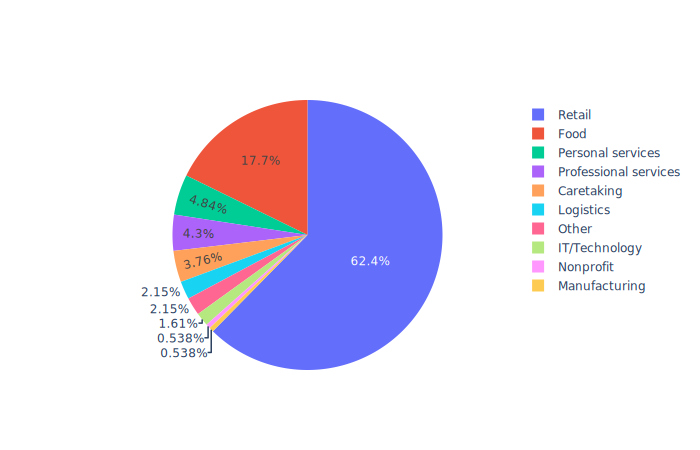

'\n\n'

In [4]:
import pandas as pd
import plotly.graph_objects as go

data=pd.read_excel(r"C:\Users\Pinar\Documents\Commerce\Restore_Reopen\Restore and Reopen Grant Report 9.6.20(1).xlsx")
#number of grantees by sector - think of a creative way to show this.. bubbles in covid report look cool
industry_group = data.groupby(by=['Type Of Business (select One)']).size()
print(industry_group)

industry = list(industry_group.keys())
industry[0]='Nonprofit'
industry[1]='Caretaking'
industry[2]='Logistics'
industry[-2]='Food'
industry[6]='Personal services'
industry[7]='Professional services'
tally = industry_group.values.tolist()
print(industry)

industry_graph = go.Figure(data=[go.Pie(labels=industry,values=tally)])
industry_graph.show(renderer='svg')
"""

"""

In [165]:
import pandas as pd
import plotly.graph_objects as go

#GRANT BREAKDOWN
grants = data['R&R Grant Amount  $']
avg_grant = grants.mean()
mode_grant = grants.median()
total_grant = grants.sum()
print(avg_grant, mode_grant, total_grant)

8440.032258064517 10000.0 1569846


In [51]:
import pandas as pd
from collections import Counter

#to collect internal data for commerce program evaluation

data = pd.read_csv(r"C:\Users\Pinar\Documents\Commerce\Restore_Reopen\R_R Grant Agreement Additional.csv")
data = data.iloc[:,19:27]
#print(data)

raw_categories = data.loc[:,'Restore & Reopen App - How Did You Hear About This Grant Program? (check All That Apply)']
all_instances = []
for raw_org in raw_categories:
    all_orgs = raw_org.splitlines()
    for org in all_orgs:
        all_instances.append(org)
#print(len(all_instances))
keys=Counter(all_instances).keys()
values=Counter(all_instances).values()
x=list(zip(keys,values))
org_frequency = pd.DataFrame(x,columns=['Organization','Frequency'])
print(org_frequency)

person_sources = data.loc[:,'Restore & Reopen App - Who?'].dropna()
social_media_sources = data.loc[:,'Restore & Reopen App - What Platform? (eg Facebook, Instagram, Linked In, Twitter)'].dropna()
business_sources = data.loc[:,'Restore & Reopen App - What Business?'].dropna()
other_sources = data.loc[:,'Restore & Reopen App - Please Explain - '].dropna()


with pd.ExcelWriter(r'C:\Users\Pinar\Documents\Commerce\Restore_Reopen\internal.xlsx') as writer:  
    org_frequency.to_excel(writer, sheet_name='Org Freq',index=False)
    person_sources.to_excel(writer, sheet_name='Person Sources',index=False)
    social_media_sources.to_excel(writer,sheet_name='Social Media',index=False)
    business_sources.to_excel(writer, sheet_name='Business Sources',index=False)
    other_sources.to_excel(writer, sheet_name='Other Sources',index=False)


                   Organization  Frequency
0           Commerce Department         31
1              Another business          9
2            The Merchants Fund         45
3  CDC / community organization         45
4                  Social media         23
5                         Other         60
6                     Newspaper          2
7                          CDFI          2
8                         Radio          1


In [84]:
import pandas as pd

#race pipeline 

eligible = pd.read_csv(r"C:\Users\Pinar\Downloads\race_applicants.csv")
approved = pd.read_excel(r"C:\Users\Pinar\Documents\Commerce\Restore_Reopen\Restore and Reopen Grant Report 9.6.20(1).xlsx")

group_eligible = eligible.groupby(by=['With Which Of The Following Categories Do You Identify -  (check All That Apply)'])
print(group_eligible.size())
eligible_blacks=group_eligible.get_group('Black of African American')
#print(eligible_blacks)

approved_group = approved.groupby(by=['With Which Of The Following Categories Do You Identify -  (check All That Apply)'])
approved_blacks = approved_group.get_group('Black of African American')
#print(approved_blacks)

eligible_blacks_names = eligible_blacks.loc[:,'Linked To Business Profile - Do N O T Delete'].tolist()
eligible_blacks_names=sorted(eligible_blacks_names)
print('eligible')
print(eligible_blacks_names)
approved_blacks_names = approved_blacks.loc[:,'Name Of Business'].tolist()
approved_blacks_names=sorted(approved_blacks_names)
print('approved')
print(approved_blacks_names)



print('length aa')
print(len(blacks))
print('length')
print(len(data))
print('APPROVED')
print(len(eligible_blacks_names),len(approved_blacks_names))

"""
approved:
Asian: 100
Black of African American: 53
Choose not to answer: 6
Multiracial: 7
Other race, ethnicity, origin: 10
White/Caucasian: 10

100/125 asian apps approved
53/53 black eligible apps were approved
7/9 multiracial apps approved
7/8 hispanic apps approved

"""
latin = eligible.groupby(by=['Are You Of Hispanic, Latino, Or Spanish Origin?'])
print(latin.size())

With Which Of The Following Categories Do You Identify -  (check All That Apply)
Asian                                                          125
Asian\nOther race, ethnicity, origin                             2
Black of African American                                       53
Black of African American\nNative American or Alaska Native      1
Black of African American\nOther race, ethnicity, origin         2
Choose not to answer                                             8
Multiracial                                                      4
Other race, ethnicity, origin                                   14
White/Caucasian                                                 16
dtype: int64
eligible
['2S moving and transportation', '9th & Girard Pharmacy', 'A.O.K Hair company llc', 'B & A Pharmacy', 'Brewerytown Rx Inc', 'Broad and grange pharmacy', 'Children Space learning Academy', 'DeShields Enterprises, LLC dba What A Crock Meals', 'FKATAN LLC', 'Germantown Electronics', 'Golden Healt

In [27]:
import pandas as pd

#for nick
data = pd.read_csv(r"C:\Users\Pinar\Documents\Commerce\Restore_Reopen\nick.csv")
folder_group= data.groupby(by='Folder - Name')
folder_names = folder_group.groups.keys()
print(folder_names)
folder_damages = []

for category in folder_group.groups.keys():
    df = folder_group.get_group(category)
    folder_damages.append(df['Total Of Damage:'].sum())
    
folder_zip = dict(zip(folder_names,folder_damages))
print(folder_zip)


dict_keys(['Approved for Agreement', 'Denied', 'Grant Completed', 'Held for Follow-up', 'In Progress', 'Ineligible', 'Rescinded', 'Uncategorized'])
{'Approved for Agreement': 0, 'Denied': 7505481, 'Grant Completed': 25965216, 'Held for Follow-up': 1443003, 'In Progress': 2488816, 'Ineligible': 2578499, 'Rescinded': 33479, 'Uncategorized': 175350}
